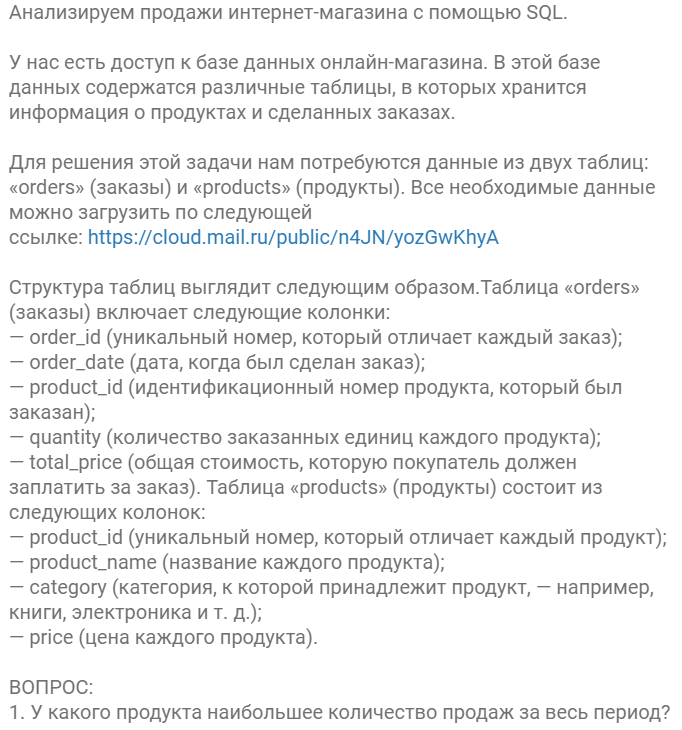

https://cloud.mail.ru/public/n4JN/yozGwKhyA

In [1]:
import sqlite3
import pandas as pd

In [2]:
connection = sqlite3.connect('my_online_store.db')

In [3]:
query = """
SELECT *
FROM orders
"""
df = pd.read_sql_query(query, connection)
df.head()

,order_id,order_date,product_id,quantity,total_price
0,1,2023-07-13,24,9,3726.45
1,2,2023-02-08,75,1,182.71
2,3,2023-02-14,6,6,2879.58
3,4,2023-10-07,16,7,2218.37
4,5,2023-02-03,100,10,3540.80


In [4]:
query = """
SELECT *
FROM products
"""
df = pd.read_sql_query(query, connection)
df.head()

,product_id,product_name,category,price
0,1,ubaltprv,Электроника,466.47
1,2,tDBDlti,Аксессуары,342.91
2,3,SSoERVQYlXlXo,Книги,44.12
3,4,bSyPlTJrVTVEn,Аксессуары,15.49
4,5,OUlXxH,Аксессуары,451.51


In [11]:
query = """
SELECT orders.*,
       products.product_name
FROM orders
INNER JOIN products ON orders.product_id = products.product_id
;
"""
df = pd.read_sql_query(query, connection)
df.head()

,order_id,order_date,product_id,quantity,total_price,product_name
0,1,2023-07-13,24,9,3726.45,YQgQAxnvUD
1,2,2023-02-08,75,1,182.71,TIJiEOeS
2,3,2023-02-14,6,6,2879.58,dheuOSsoAYqmJz
3,4,2023-10-07,16,7,2218.37,gBsuy
4,5,2023-02-03,100,10,3540.80,TBvydjC


In [19]:
df.groupby('product_name')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False)

,product_name,quantity
7,HFvpNNVhmAUgDZ,21
25,XNtKWqcoz,19
21,VnAYxuQnzvstPBx,18
35,gBsuy,18
51,tDBDlti,16
...,...,...
4,FpQHCWe,2
30,bSyPlTJrVTVEn,1
56,xVgdSaytGNzh,1
40,nEGTIy,1


HFvpNNVhmAUgDZ

In [31]:
query = """
SELECT product_id,
       SUM(quantity) as quantity
FROM orders
GROUP BY product_id
ORDER BY quantity DESC
;
"""
df = pd.read_sql_query(query, connection)
df.head()

,product_id,quantity
0,96,21
1,62,19
2,87,18
3,16,18
4,98,16


In [33]:
query = """
SELECT product_name
FROM products
WHERE product_id == 96
;
"""
df = pd.read_sql_query(query, connection)
df.head()

,product_name
0,HFvpNNVhmAUgDZ


In [39]:
query = """
SELECT products.product_name,
       SUM(orders.quantity) as quantity
FROM orders
INNER JOIN products ON orders.product_id = products.product_id
GROUP BY product_name
ORDER BY quantity DESC
;
"""
df = pd.read_sql_query(query, connection)
df.head()

,product_name,quantity
0,HFvpNNVhmAUgDZ,21
1,XNtKWqcoz,19
2,gBsuy,18
3,VnAYxuQnzvstPBx,18
4,tDBDlti,16


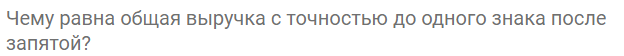

In [40]:
query = """
SELECT SUM(total_price)
FROM orders
;
"""
df = pd.read_sql_query(query, connection)
df.head()

,SUM(total_price)
0,145545.39


145545.4